In [67]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import  LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [2]:
os.chdir(r'C:\Users\New User\Desktop\python files')

In [47]:
df = pd.read_csv('HR_comma_sep.csv')
df.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [83]:
col_int_1 = df[['salary', 'left','department']]

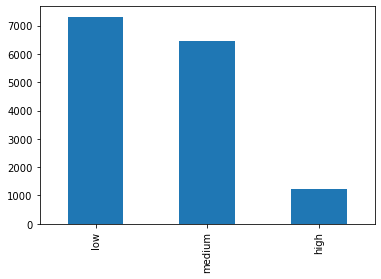

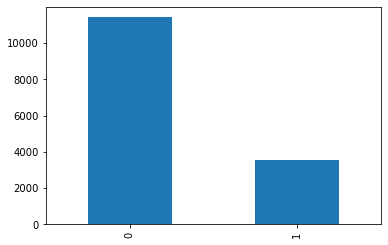

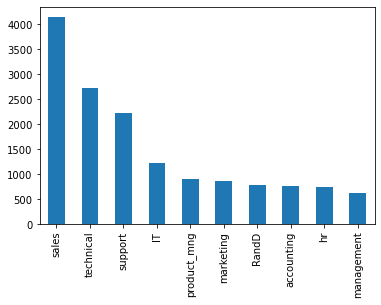

In [84]:
col_int_1.salary.value_counts().plot(kind = 'bar')
plt.show()
col_int_1.left.value_counts().plot(kind = 'bar')
plt.show()
col_int_1.department.value_counts().plot(kind = 'bar')
plt.show()

## getting dummy variuables for departments

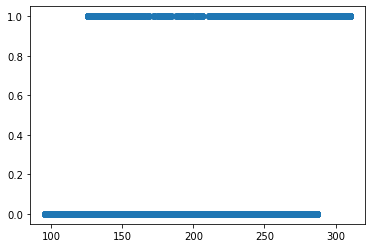

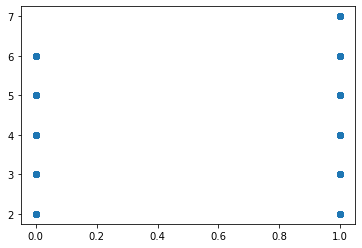

In [112]:
x1 = df.average_montly_hours
y1 = df.left
plt.scatter(x1, y1)
plt.show()

x1 = df.number_project
y1 = df.left
plt.scatter(y1, x1)
plt.show()


In [ ]:
df.describe()

In [86]:
dummy = pd.get_dummies(df.department)
dummy.head(5)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [87]:
merged = pd.concat([df,dummy],axis = 'columns') 
merged.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0


In [88]:
df_in = merged.drop(['department', 'IT'], axis = 'columns')
df_in.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,1,0,0


## changing  text to values salary  column

In [89]:
le = LabelEncoder()

In [90]:
df_in.salary = le.fit_transform(df_in.salary)
df_in.head(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0


In [113]:
x_df = df_in
x = x_df.drop(['last_evaluation','left', 'Work_accident'], axis = 'columns')
y = df_in.left

In [114]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [115]:
model_lr =  linear_model.LogisticRegression()

In [116]:
model_lr.fit(x_train, y_train)

C:\Users\New User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [117]:
model_lr.score(x_test,y_test)

0.7582222222222222